# How to access the Santos Dumont (SD) supercomputer using an instance of JupyterLab running on the local machine

*Last edited: 2022-04-07*

Prerequisite: knowing how to use Jupyter (JupyterLab, Jupyter Notebook, etc.).

First, it is necessary that Jupyter is installed and running on the local machine, using for example a distribution like Anaconda, or the Intel Distribution for Python.

It is also necessary to have the access account, and configure vpnc (via Network Manager) and ssh both on the local and remote machine.

The next step is to connect, via vnpc, using the Network Manager, and then, open a terminal inside JupyterLab:

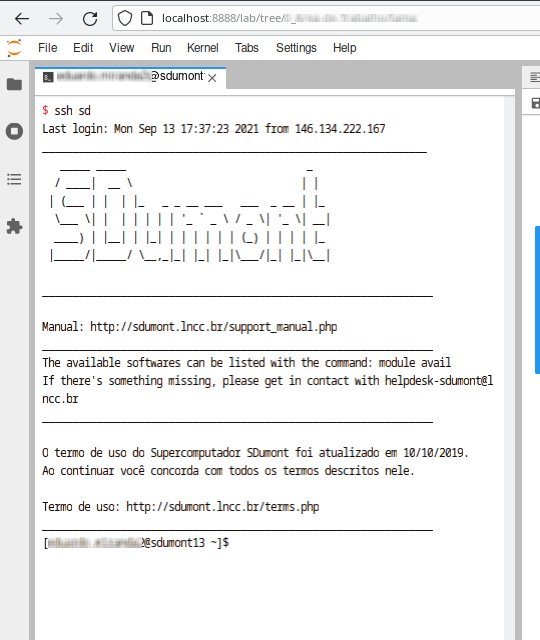

At this point, it's a good idea to create a `hostname_sd.txt` file containing the name of the login node you are currently using, so you can use it later without having to memorize or annotate
```
$ hostname > hostname_sd.txt
```

The next step is to use the "screen" command to create a new console session, so that it is possible, for example
* exit the SD and return later, without losing what you were doing
* configure several sessions, one for example for each version of the environment being used (example: Anaconda, Intel, etc.), each one with its environment variables, modules, etc.. In each session an instance of JupyterLab will be running

Creates a new session called session_anaconda:

```
$ screen -S session_anaconda
```

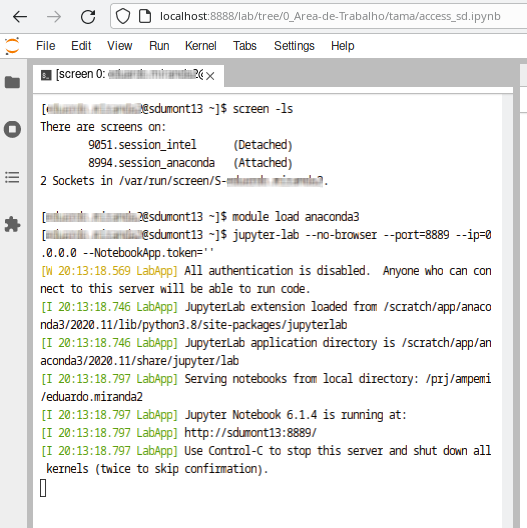

The screen will clear, and the new session will be up and running. Examples of commands that can be used with `screen`:
* `exit` : exits the current session and loses everything you are doing in this session
* `Ctrl+a` `Ctrl+d` : go back to the previous session and keep the current one
* `screen -ls` : list active sessions
* `screen -r session_anaconda` : enters a previous session

For this session (session_anaconda) we will load the anaconda module, and also a JupyterLab server instance from the Anaconda package, on port 8889 (Note: `--NotebookApp.token=''` is not recommended for security reasons)
```
$ module load anaconda3
$ jupyter-lab --no-browser --port=8889 --ip=0.0.0.0 --NotebookApp.token=''
```

Let's go back to the previous session with `Ctrl+a` `Ctrl+d` and create a new session with one instance of Jupyter Notebook (Intel doesn't have JupyterLab) on port 8890
```
$ screen -S session_intel
$ module load intel_psxe
$ jupyter-notebook --no-browser --port=8890 --ip=0.0.0.0 --NotebookApp.token=''
```

We now use SSH port forwarding to access Jupyter instances on the local machine. Notice how we used the previously saved hostname. The command `ssfs` is used to mount the filesystem on the local machine 
```
$ scp -q sd:hostname_sd.txt ~/
$ export HOSTNAME_SD=$(cat ~/hostname_sd.txt)
$ ssh sd -L 8889:$HOSTNAME_SD:8889 -NTf
$ ssh sd -L 8890:$HOSTNAME_SD:8890 -NTf
$ sshfs sd:/ /mnt/sd -o workaround=rename,uid=1000,gid=1000
```

Now we have the view of two instances of JupyteLab, local and remote (Anaconda) , and one instance of Jupyter Notebook (Intel) remote

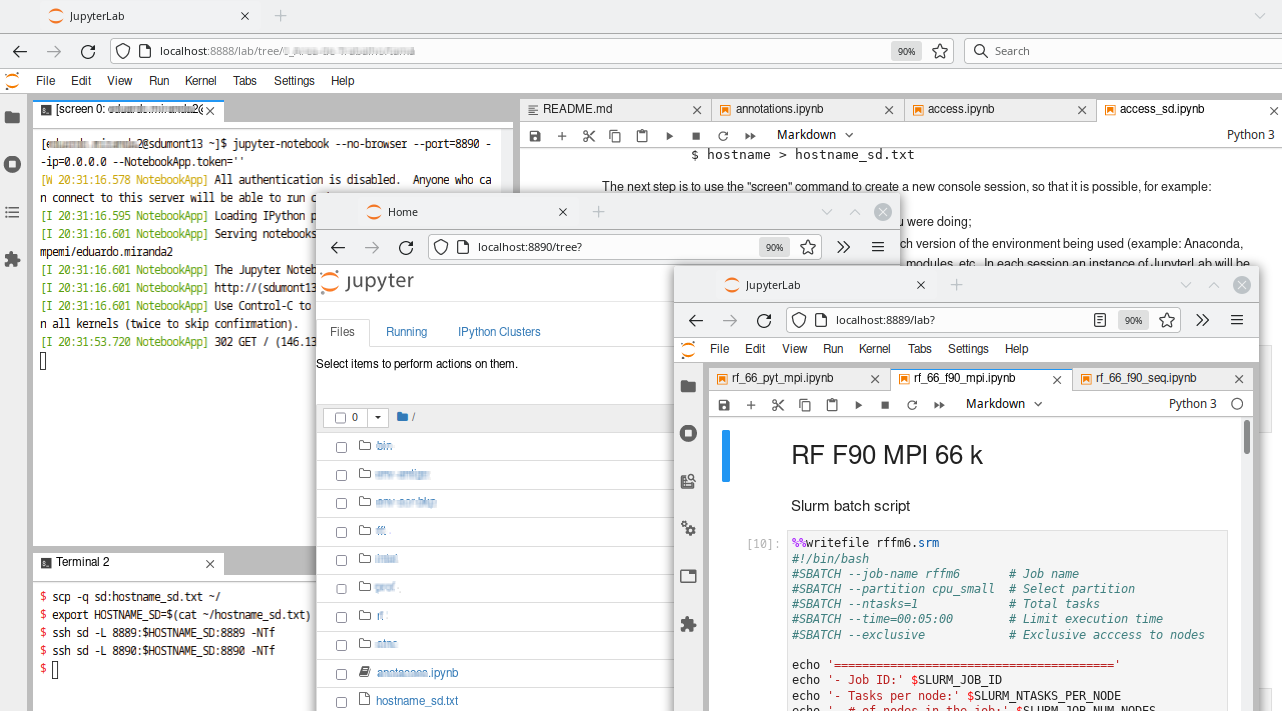

Working this way, it is not necessary to keep loading or unloading modules, configuring environment variables, and so on. All environments are available at the same time, and interactively.